# Atelier 2 : Traitement de données Textuelles (Word2Vec)

#### Réalisé par : Ismail CHAKRANE / Rida ASRI

In [1]:
from functions import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
file = "PubMed-multi-label-dataset.csv"
data = import_data(file)
data

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...",1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...",1,1,0,1,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Five donors-one recipient: modeling a mosaic o...,BACKGROUND: A 21-year-old man was admitted to ...,"['Adult', 'Cell Transplantation', 'Cord Blood ...",18364724,"[['M01.060.116'], ['E02.095.147.500', 'E04.936...","['Named Groups [M]', 'Analytical, Diagnostic a...",1,1,1,0,1,0,1,0,0,0,0,1,0,0
49996,The role of eicosanoids in cyclosporine nephro...,Nephrotoxicity is the most troublesome complic...,"['Animals', 'Cyclosporins', 'In Vitro Techniqu...",2735953,"[['B01.050'], ['D04.345.566.235', 'D12.644.641...","['Organisms [B]', 'Chemicals and Drugs [D]', '...",1,1,0,1,1,0,0,0,0,0,0,0,0,0
49997,Impact of pancreaticoduodenal arcade dilation ...,BACKGROUND: The aim of this study was to inves...,"['Adult', 'Aged', 'Aged, 80 and over', 'Dilata...",28919282,"[['M01.060.116'], ['M01.060.116.100'], ['M01.0...","['Named Groups [M]', 'Diseases [C]', 'Anatomy ...",1,1,1,0,1,0,0,0,0,0,0,1,1,0
49998,Outcomes of Preterm Infants following Discussi...,OBJECTIVES: To describe the frequency of postn...,"['Decision Making', 'Female', 'Humans', 'Infan...",28647272,"[['F02.463.785.373'], ['B01.050.150.900.649.31...","['Psychiatry and Psychology [F]', 'Organisms [...",0,1,0,0,1,1,0,1,0,0,0,1,1,0


In [3]:
data = traiter_data(data)
corpus = data['abstractText']
corpus

0        fiftyfour paraffin embedded tissue section pat...
1        present crosssectional study conducted determi...
2        occurrence individual amino acid dipeptide fra...
3        1980 lim sun introduced microcapsule coated al...
4        substantially improved hydrogel particle based...
                               ...                        
49995    background 21yearold man admitted hospital leu...
49996    nephrotoxicity troublesome complication cyclos...
49997    background aim study investigate impact pancre...
49998    objective describe frequency postnatal discuss...
49999    solitary lymphocytoma rare cutaneous manifesta...
Name: abstractText, Length: 50000, dtype: object

## Apprentissage du Word2vec

In [4]:
corpus = corpus.apply(lambda line : gensim.utils.simple_preprocess((line)))
corpus

0        [fiftyfour, paraffin, embedded, tissue, sectio...
1        [present, crosssectional, study, conducted, de...
2        [occurrence, individual, amino, acid, dipeptid...
3        [lim, sun, introduced, microcapsule, coated, c...
4        [substantially, improved, hydrogel, particle, ...
                               ...                        
49995    [background, yearold, man, admitted, hospital,...
49996    [nephrotoxicity, troublesome, complication, cy...
49997    [background, aim, study, investigate, impact, ...
49998    [objective, describe, frequency, postnatal, di...
49999    [solitary, lymphocytoma, rare, cutaneous, mani...
Name: abstractText, Length: 50000, dtype: object

In [14]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

8

In [15]:
model_size = 100
model = gensim.models.Word2Vec(corpus,vector_size=model_size,sg=0,window=5,min_count=2,workers=cores-1)

In [16]:
for i in range(100):
    model.train(corpus,total_examples=len(corpus),epochs=1)
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [17]:
model.save('Word2vec_entraine.h5')

In [5]:
model = gensim.models.Word2Vec.load('Word2vec_entraine.h5')

In [19]:
len(model.wv.index_to_key)

88181

In [6]:
model = model.wv
model['easy']

array([ 1.3605791 , -0.88159776,  0.4686096 ,  1.1467972 ,  0.3541196 ,
        0.56688994,  0.66813886, -0.8032734 , -0.90564525, -0.60264224,
        1.283092  , -0.62345946,  0.02541595, -1.7728721 ,  0.34663445,
        0.9429651 ,  2.9408042 ,  0.37967867,  2.6267684 , -0.5341062 ,
        3.6167545 , -0.7044221 , -1.4545158 , -0.05364152, -0.12458803,
       -2.0818856 , -3.3683946 , -1.2174916 ,  3.1023884 , -1.7671677 ,
       -1.3207092 , -0.14167935,  2.2022862 , -1.9343194 ,  2.8265417 ,
       -0.92245126,  0.87472445, -3.504815  , -1.0810663 ,  1.6233596 ,
        0.4391077 , -0.07090167, -1.1740737 , -4.487269  ,  0.21859176,
        0.10656508,  1.2905217 ,  2.2875233 ,  1.0013688 ,  1.0418974 ,
       -2.865066  , -0.1525826 ,  0.593963  , -0.6769124 ,  0.71672916,
        0.5475015 ,  1.7217888 , -1.834263  ,  0.54567426, -3.9557824 ,
       -0.5414106 , -0.87830424,  0.7510319 ,  0.45290563, -1.5830125 ,
       -1.2343434 ,  0.5823429 , -5.764821  ,  2.2538328 , -3.19

## Évaluation numérique

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

word1, word2 = "tumor", "cancer"
word1_vec = model[word1].reshape(1, -1)
word2_vec = model[word2].reshape(1, -1)
similarity = cosine_similarity(word1_vec, word2_vec)[0][0]
print(f"Similarité entre '{word1}' et '{word2}': {similarity:.4f}")

word1, word2 = "tumor", "lesion"
word1_vec = model[word1].reshape(1, -1)
word2_vec = model[word2].reshape(1, -1)
similarity = cosine_similarity(word1_vec, word2_vec)[0][0]
print(f"Similarité entre '{word1}' et '{word2}': {similarity:.4f}")

word1, word2 = "tumor", "man"
word1_vec = model[word1].reshape(1, -1)
word2_vec = model[word2].reshape(1, -1)
similarity = cosine_similarity(word1_vec, word2_vec)[0][0]
print(f"Similarité entre '{word1}' et '{word2}': {similarity:.4f}")

word1, word2 = "tumor", "male"
word1_vec = model[word1].reshape(1, -1)
word2_vec = model[word2].reshape(1, -1)
similarity = cosine_similarity(word1_vec, word2_vec)[0][0]
print(f"Similarité entre '{word1}' et '{word2}': {similarity:.4f}")

word = "tumor"
neighbors = model.most_similar(word, topn=5)
print(f"les 5 plus proches voisins de '{word}':")

for word, score in neighbors:
    print(f" {word} avec un score de {score}")

Similarité entre 'tumor' et 'cancer': 0.5433
Similarité entre 'tumor' et 'lesion': 0.5332
Similarité entre 'tumor' et 'man': -0.0801
Similarité entre 'tumor' et 'male': 0.0070
les 5 plus proches voisins de 'tumor':
 tumour avec un score de 0.8994901180267334
 metastasis avec un score de 0.7076066136360168
 glioma avec un score de 0.6779757142066956
 melanoma avec un score de 0.6540905833244324
 neoplasm avec un score de 0.5901519656181335


## Évaluation visuelle

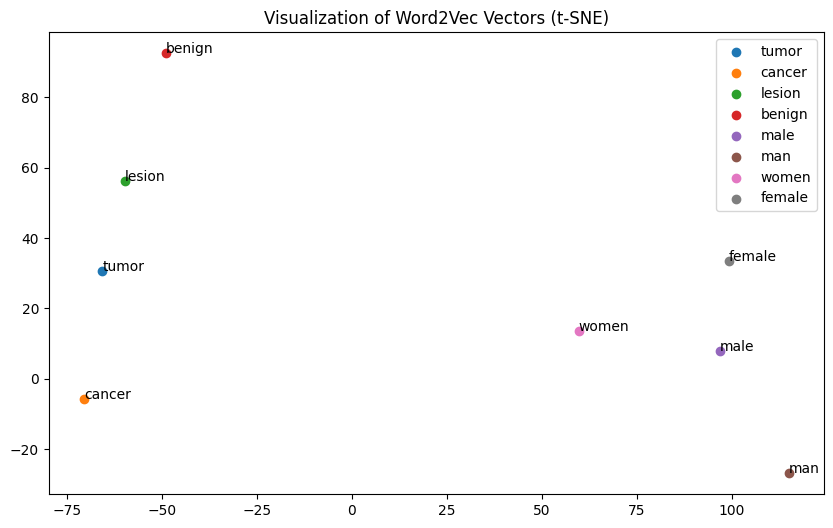

In [14]:
from sklearn.manifold import TSNE

words = ["tumor", "cancer", "lesion", "benign", "male", "man", "women", "female"]

word_vectors = np.array([model[word] for word in words if word in model])

if len(word_vectors) == 0:
    print("No word vectors found for the provided corpus in the model.")
else:
    tsne = TSNE(n_components=2, random_state=42, perplexity=2)
    reduced_vectors = tsne.fit_transform(word_vectors)
    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        if word in model:
            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=word)
            plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title("Visualization of Word2Vec Vectors (t-SNE)")
    plt.legend()
    plt.show()

On remarque bien que la distance, par exemple, entre cancer et man est assez grande par rapport à man et mâle, ce qui explique la distance aussi sémantique des embedding dans l'espace flattent

## Exploitation

In [7]:
y = data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']]
X_train_texts, X_test_texts, y_train, y_test = separer_data(corpus, y)

In [8]:
X_train_word2vec = word2vec_generator(X_train_texts, model, model.vector_size)
X_test_word2vec = word2vec_generator(X_test_texts, model, model.vector_size)

In [9]:
X_train_word2vec

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.371768,0.318010,0.149261,-0.074096,0.392200,0.437177,0.075681,-0.444102,0.344596,0.396358,...,-0.315819,-0.682730,0.261725,0.203959,0.912886,0.436720,-0.697609,0.454294,0.097769,-0.779093
1,0.391947,0.135588,0.033298,0.808972,-0.223673,0.161866,0.933149,0.165420,-0.327622,0.085580,...,-0.877116,-0.260234,1.068922,-0.174519,0.070298,-0.204940,0.796120,0.014526,0.180344,1.115998
2,-0.324721,-0.076113,-0.033872,0.129175,0.066756,-0.247037,0.340462,0.243182,-0.168628,-0.374797,...,-0.608928,0.252821,0.049425,-0.168414,0.076617,-0.034436,0.473655,0.232086,0.192475,0.353406
3,-0.318825,0.055721,-0.053951,-0.210636,0.024042,-0.162400,0.117150,0.148482,-0.241432,-0.374279,...,-0.184191,0.390520,-0.329049,-0.201015,0.008029,0.206405,-0.053608,0.333993,-0.311994,0.157460
4,0.728656,0.643773,0.406667,-0.177170,0.304469,-0.751218,0.177601,-1.013667,0.094580,0.359035,...,-0.004453,-0.460691,0.380012,-0.155407,0.360165,0.133791,0.294274,0.405994,0.003691,-0.156593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.142080,-0.124582,-0.104542,-0.175382,0.014745,-0.439132,-0.561676,0.814944,0.759464,0.438991,...,-0.096607,-0.052248,-0.414761,0.353991,0.343197,0.410566,-0.711958,0.607181,-0.136553,0.305781
24996,-0.546177,0.172651,-1.104113,-0.022068,-0.050589,-0.090297,-0.262820,0.674535,-0.048192,0.040903,...,0.249762,0.242480,0.383401,-0.248788,0.230685,-0.128398,-0.183220,0.311059,-0.678404,0.554685
24997,-0.371314,0.493488,0.164472,-0.509539,-0.262238,0.504915,-0.061705,-0.510300,-0.068739,0.271571,...,-0.302248,-0.658628,0.465434,-0.104766,0.441622,-0.349202,-0.546307,-0.047466,-0.220072,-0.196723
24998,-0.208371,-0.076854,0.213351,0.501690,0.302331,-0.924715,-0.377105,0.694830,0.073448,-0.777670,...,-0.298961,0.581125,-0.181368,0.276614,0.025720,-0.287000,0.058052,0.512318,0.156620,0.544193


In [48]:
results_word2vec = run_models(X_train_word2vec, y_train, X_test_word2vec, y_test)

Nombre optimal de voisins pour KNN : 19
Entraînement de KNN avec ClassifierChain...
Entraînement de KNN avec MultiOutputClassifier...
Entraînement de NN avec ClassifierChain...
Entraînement de NN avec MultiOutputClassifier...

Comparaison des performances des modèles :
                     micro-F1  macro-F1  zero-one-loss
KNN_ClassifierChain  0.835048  0.714806        0.85600
KNN_MultiOutput      0.834863  0.713611        0.85672
NN_ClassifierChain   0.819304  0.716831        0.87824
NN_MultiOutput       0.803697  0.703310        0.90556


In [16]:
corpus_tfidf = [" ".join(i) for i in corpus]
corpus_tfidf

['fiftyfour paraffin embedded tissue section patient dysplasia case cervical cancer case analysed hpv detected identified two stage firstly using mixed starter chosen genomic dna sequence amplified secondly material thus obtained analyzed hybridization method using oligonucleotyde labelled probe hpvs type identified expression assayed method hpv infection often associated dysplasia cervical cancer cervical cancer mainly hpv high oncogenic potential found present rarely minute quantity correlation observed presence hpvs dna',
 'present crosssectional study conducted determine vitamin status pregnant indian woman breastfed infant subject recruited department obstetrics armed force clinic army hospital research referral delhi total apparently healthy woman uncomplicated single intrauterine gestation reporting trimester consecutively recruited woman first trimester ninetyseven second trimester third trimester seventyseven recruited summer apriloctober first trimester fiftynine second trime

In [17]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_tfidf)
X_train_word2vec_tfidf = word2vec_generator_tfidf(X_train_texts, model, model.vector_size, tfidf_vectorizer)
X_test_word2vec_tfidf = word2vec_generator_tfidf(X_test_texts, model, model.vector_size, tfidf_vectorizer)

In [9]:
X_test_word2vec_tfidf.shape

(25000, 100)

In [10]:
results_word2vec_tfidf = run_models(X_train_word2vec_tfidf, y_train, X_test_word2vec_tfidf, y_test)

Nombre optimal de voisins pour KNN : 19
Entraînement de KNN avec ClassifierChain...
Entraînement de KNN avec MultiOutputClassifier...
Entraînement de NN avec ClassifierChain...
Entraînement de NN avec MultiOutputClassifier...

Comparaison des performances des modèles :
                     micro-F1  macro-F1  zero-one-loss
KNN_ClassifierChain  0.834313  0.716466        0.85700
KNN_MultiOutput      0.833937  0.715050        0.85784
NN_ClassifierChain   0.817305  0.714731        0.88228
NN_MultiOutput       0.800721  0.698298        0.90584


In [18]:
model_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec_google = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [12]:
word2vec_google.vector_size

300

In [13]:
word2vec_google["easy"]

array([ 0.30664062,  0.06835938, -0.16015625,  0.11962891, -0.00656128,
        0.00439453,  0.14453125,  0.06201172,  0.07177734,  0.0267334 ,
        0.09912109, -0.02307129,  0.05664062, -0.17480469, -0.05322266,
        0.08984375,  0.29492188, -0.06591797,  0.13574219, -0.17382812,
        0.07324219,  0.20800781,  0.07275391,  0.21972656, -0.05029297,
       -0.11523438, -0.18066406, -0.00000429, -0.16992188, -0.07617188,
       -0.00430298,  0.171875  ,  0.2578125 , -0.13378906,  0.03955078,
        0.00424194, -0.02807617, -0.15429688,  0.17675781,  0.06689453,
        0.27148438, -0.14355469,  0.40234375, -0.11914062, -0.02587891,
       -0.05639648,  0.0378418 ,  0.04296875,  0.02929688, -0.02111816,
       -0.04150391,  0.06298828, -0.01904297, -0.06103516, -0.16699219,
        0.10546875,  0.0004406 , -0.18164062,  0.19042969,  0.06982422,
       -0.08642578, -0.06835938, -0.30859375, -0.125     , -0.01672363,
       -0.10351562, -0.25976562,  0.02294922, -0.10107422, -0.00

In [19]:
X_train_word2vec_google = word2vec_generator(X_train_texts, word2vec_google, word2vec_google.vector_size)
X_test_word2vec_google = word2vec_generator(X_test_texts, word2vec_google, word2vec_google.vector_size)

In [15]:
X_train_word2vec_google.shape

(25000, 300)

In [16]:
results_google_word2vec = run_models(X_train_word2vec_google, y_train, X_test_word2vec_google, y_test)

Nombre optimal de voisins pour KNN : 19
Entraînement de KNN avec ClassifierChain...
Entraînement de KNN avec MultiOutputClassifier...
Entraînement de NN avec ClassifierChain...
Entraînement de NN avec MultiOutputClassifier...

Comparaison des performances des modèles :
                     micro-F1  macro-F1  zero-one-loss
KNN_ClassifierChain  0.823188  0.681442        0.87496
KNN_MultiOutput      0.829504  0.698850        0.87204
NN_ClassifierChain   0.818771  0.715312        0.88004
NN_MultiOutput       0.799924  0.694692        0.90996


In [20]:
X_train_word2vec_google_tfidf = word2vec_generator_tfidf(X_train_texts, word2vec_google, word2vec_google.vector_size, tfidf_vectorizer)
X_test_word2vec_google_tfidf = word2vec_generator_tfidf(X_test_texts, word2vec_google, word2vec_google.vector_size, tfidf_vectorizer)

In [21]:
results_google_word2vec_tfidf = run_models(X_train_word2vec_google_tfidf, y_train, X_test_word2vec_google_tfidf, y_test)

Nombre optimal de voisins pour KNN : 19
Entraînement de KNN avec ClassifierChain...
Entraînement de KNN avec MultiOutputClassifier...
Entraînement de NN avec ClassifierChain...
Entraînement de NN avec MultiOutputClassifier...

Comparaison des performances des modèles :
                     micro-F1  macro-F1  zero-one-loss
KNN_ClassifierChain  0.821055  0.680223        0.87612
KNN_MultiOutput      0.826549  0.695081        0.87544
NN_ClassifierChain   0.814642  0.712104        0.88956
NN_MultiOutput       0.798338  0.695043        0.91096


Pour extraire le meilleur modèle, on a comparé les 12 métriques (4 modèles x 3 métriques) et on a vu le modèle qui a pu performer le plus entre les 12, et d'après les résultats, le meilleur modèle entre les 6 méthodes : TF-IDF, TF-IDF + SVD, Word2Vec, Word2Vec + TF-IDF, Word2Vec Google, Word2Vec Google + TF-IDF était : **Word2Vec** et donc on va l'adopter pour développer notre pipeline finale.

In [11]:
results = pipeline(data)

Preparation des données ☑️
Séparation des données ☑️
Création des embedding ☑️
Entraînement des Modèles...
Nombre optimal de voisins pour KNN : 19
Entraînement de KNN avec ClassifierChain...
Entraînement de KNN avec MultiOutputClassifier...
Entraînement de NN avec ClassifierChain...
Entraînement de NN avec MultiOutputClassifier...

Comparaison des performances des modèles :
                     micro-F1  macro-F1  zero-one-loss
KNN_ClassifierChain  0.834718  0.714774        0.85680
KNN_MultiOutput      0.834722  0.713942        0.85732
NN_ClassifierChain   0.819322  0.715746        0.87944
NN_MultiOutput       0.803197  0.701100        0.90612
